# HEPATITIS PREDICTION WITH PYCARET

### Installing Pycaret

In [1]:
# !pip install pycaret
# !pip install shap
# !pip install boto3

### Importing useful libraries

In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *
# from pycaret.regression import *

### Getting data and importation

In [2]:
# all_datasets = get_data('index')
hepatitis_data = get_data("hepatitis")

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [3]:
hepatitis_data.tail(2)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
152,0,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2
153,1,43,1,2.0,2,1,2,2,2.0,2.0,1.0,1.0,1.0,2.0,1.2,100.0,19.0,3.1,42.0,2


### Setting-up Pycaret model environment

In [4]:
hepatitis_model_setup = setup(hepatitis_data, target = 'Class')

,Description,Value
0,session_id,6023
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(154, 20)"
5,Missing Values,1
6,Numeric Features,6
7,Categorical Features,13
8,Ordinal Features,0
9,High Cardinality Features,0


### Comparing Models

This trains all the models in the model library and compares the common evaluation metrics for both Classification and Regression model operations using K-fold cross validation with a defaulted value for k=10.

* Metrics checked for Classification models include: Accuracy, AUC, Recall, Precision, F1, Kappa.
* Metrics checked for Regression models include: MAE, MSE, RMSE, R2, RMSLE, MAPE.

The model with the best Accuracy score will be chosen as it is obvious it out-performed other model on the dataset.

In [5]:
compare_models(fold=20, sort="Accuracy")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8633,0.8938,0.5750,0.5250,0.5333,0.4867,0.4995,0.0475
et,Extra Trees Classifier,0.8567,0.8925,0.5750,0.5250,0.5333,0.4810,0.4916,0.0410
lr,Logistic Regression,0.8450,0.8750,0.6250,0.5750,0.5833,0.5141,0.5222,0.1670
ridge,Ridge Classifier,0.8367,0.0000,0.6250,0.5417,0.5583,0.4909,0.5051,0.0040
xgboost,Extreme Gradient Boosting,0.8283,0.8588,0.5500,0.4500,0.4833,0.4253,0.4337,14.7900
lightgbm,Light Gradient Boosting Machine,0.8283,0.8625,0.4750,0.4167,0.4250,0.3737,0.3893,0.0115
dt,Decision Tree Classifier,0.8267,0.7525,0.6250,0.5500,0.5667,0.4789,0.4903,0.0045
ada,Ada Boost Classifier,0.8217,0.8800,0.6750,0.5333,0.5667,0.4805,0.5060,0.0225
gbc,Gradient Boosting Classifier,0.8183,0.8750,0.5000,0.4250,0.4500,0.3886,0.3964,0.0150
lda,Linear Discriminant Analysis,0.8167,0.8550,0.6250,0.4917,0.5250,0.4455,0.4663,0.0045


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6023, verbose=0,
                       warm_start=False)

### Creating the Model that Perform best on the Dataset

Based of the `compare_model` step, it is seen that Random Forest out-performed other models on the Hepatitis dataset.

In [6]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.9444,0.5000,0.5000,0.5000,0.3889,0.3889
1,0.9091,1.0000,0.5000,1.0000,0.6667,0.6207,0.6708
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.9722,1.0000,0.6667,0.8000,0.7442,0.7698
4,0.8182,0.8889,0.5000,0.5000,0.5000,0.3889,0.3889
5,0.7273,0.9167,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8182,0.8750,0.6667,0.6667,0.6667,0.5417,0.5417
7,0.9000,1.0000,0.5000,1.0000,0.6667,0.6154,0.6667
8,0.7000,0.5312,0.0000,0.0000,0.0000,-0.1538,-0.1667
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Accessing the parameter attributes of the model

Getting to see the likes of parameters that can be used with the model.

In [7]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 6023,
 'verbose': 0,
 'warm_start': False}

### Tuning the Model

Model tuning is necessary to get better metric scores on the model.

In [8]:
rf_tuned_model = tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,0.9444,1.0000,0.6667,0.8000,0.7442,0.7698
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.7273,1.0000,1.0000,0.4000,0.5714,0.4211,0.5164
4,0.8182,0.8889,1.0000,0.5000,0.6667,0.5600,0.6236
5,0.7273,0.9167,0.3333,0.5000,0.4000,0.2326,0.2406
6,0.8182,0.7917,0.6667,0.6667,0.6667,0.5417,0.5417
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7000,0.4375,0.0000,0.0000,0.0000,-0.1538,-0.1667
9,0.9000,1.0000,1.0000,0.6667,0.8000,0.7368,0.7638


### Ensemble the Random Forest model

This is an optimization technique to further fine-tune the Model.

In [9]:
rf_ensemble_model = ensemble_model(rf_tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,1.0000,1.0000,0.6667,0.8000,0.7442,0.7698
1,0.9091,1.0000,0.5000,1.0000,0.6667,0.6207,0.6708
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8182,0.9444,1.0000,0.5000,0.6667,0.5600,0.6236
4,0.7273,0.8889,0.5000,0.3333,0.4000,0.2326,0.2406
5,0.8182,0.9583,0.3333,1.0000,0.5000,0.4211,0.5164
6,0.8182,0.8333,0.6667,0.6667,0.6667,0.5417,0.5417
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7000,0.5000,0.0000,0.0000,0.0000,-0.1538,-0.1667
9,0.9000,1.0000,1.0000,0.6667,0.8000,0.7368,0.7638


In [10]:
rf_ensemble_model.get_params()

{'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': 'balanced',
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 2,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.1,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 10,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 40,
 'base_estimator__n_jobs': -1,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': 6023,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='gini', max_depth=2, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                   

#### Plotting Precision Recall Curve

The precision-recall curve shows the tradeoff between precision and recall for different threshold.

A high area under the curve represents both high recall and high precision.

* High precision relates to a low false positive rate, and
* High recall relates to a low false negative rate.

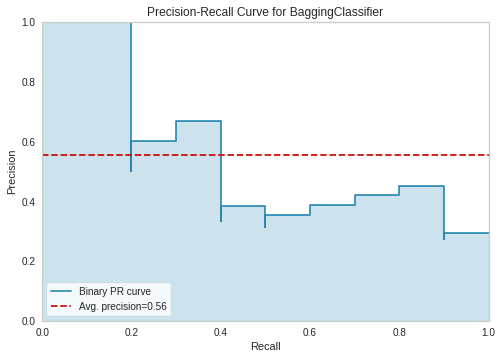

In [11]:
plot_model(rf_ensemble_model, plot='pr')

#### Plotting Area under the Curve

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

* The true-positive rate is also known as sensitivity, recall or probability of detection.
* The false-positive rate is also known as probability of false alarm.

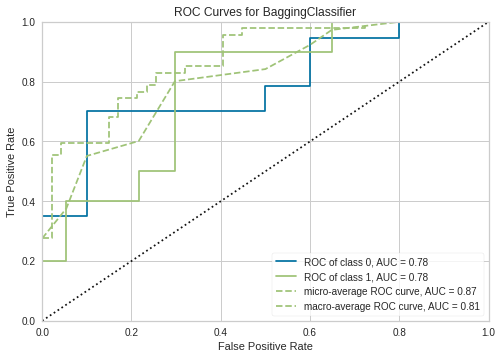

In [12]:
plot_model(rf_ensemble_model, plot='auc')

#### Plotting the Decision Boundaries

A Decision boundary is the region of a problem space in which the output label of a classifier is ambiguous.

* If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable.
* It is worth noting that the Decision boundaries are not always clear cut.

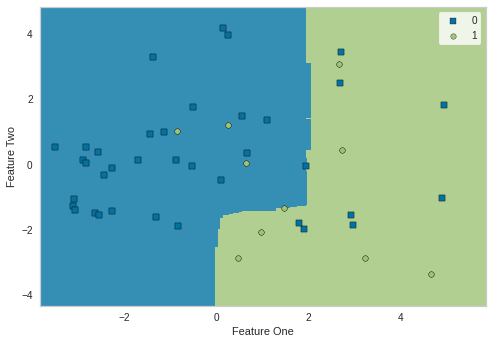

In [13]:
plot_model(rf_ensemble_model, plot='boundary')

#### Plotting Validation Curve

A Validation Curve is an important diagnostic tool that shows the sensitivity between to changes in a Machine Learning model's accuracy with change in some parameter of the model.

A validation curve is typically drawn between some parameter of the model and the model's score.

In [ ]:
plot_model(rf_ensemble_model, plot='vc')

IntProgress(value=0, description='Processing: ', max=5)

### Model Evaluation

This is an alternative method presented by PyCaret to visualize model evaluation schemes unlike the individual plots done previously.

In [14]:
evaluate_model(rf_ensemble_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Model Interpretation

In order to translate what the model stands for, interpretation is essential to bring some insight to the model performance.

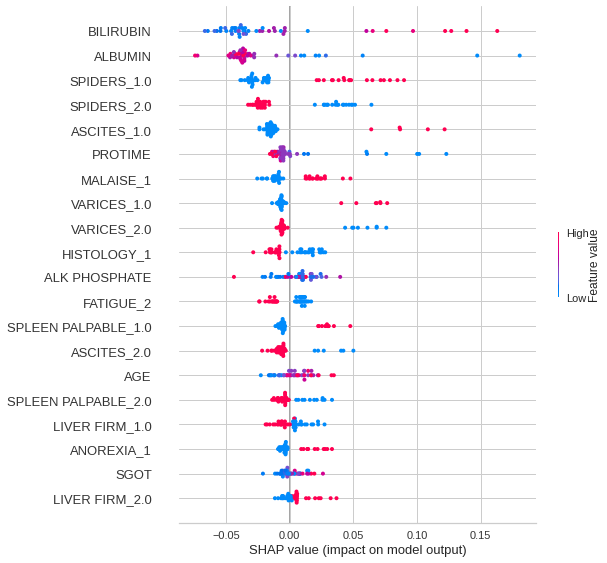

In [15]:
interpret_model(rf_model)

### Model Correlation plot

Levels of bilirubin in the blood go up and down in patients with hepatitis C.

When bilirubin levels remain high for prolonged periods, it usually means there is severe liver disease and possibly cirrhosis.

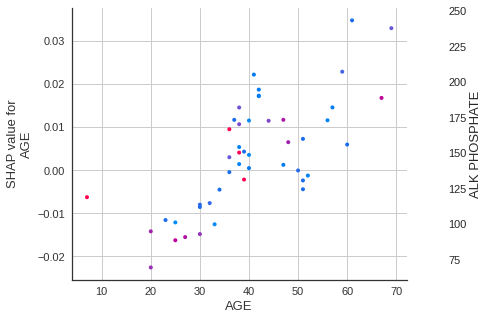

In [16]:
interpret_model(rf_model, plot='correlation')

### Interpretation of a particular Data point

In [18]:
interpret_model(rf_model, plot='reason', observation = 0)

### Predict with Model

It predicts on test / hold-out dataset and gives the prediction scores.

In [19]:
rf_model_prediction = predict_model(rf_ensemble_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7660,0.7838,0.4000,0.4444,0.4211,0.2749,0.2755


In [21]:
hepatitis_data_predictions = predict_model(rf_ensemble_model, data=hepatitis_data)

### Model prediction performance on the test dataset

It shows the individual prediction score of each dataset tuple.

PyCaret created a Score table at the far end of the dataset to check how it scores on the test set.

In [22]:
hepatitis_data_predictions.head(5)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,...,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Label,Score
0,0,30,2,1.0,2,2,2,2,1.0,2.0,...,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,0,0.8041
1,0,50,1,1.0,2,1,2,2,1.0,2.0,...,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,0,0.6792
2,0,78,1,2.0,2,1,2,2,2.0,2.0,...,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,0,0.7403
3,0,31,1,NaN,1,2,2,2,2.0,2.0,...,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,0,0.8147
4,0,34,1,2.0,2,2,2,2,2.0,2.0,...,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,0,0.7785


### Saving the Model

This is essential for transfer learning or model deployment to end-users.

In [23]:
save_model(rf_ensemble_model, model_name='rf_hepatitis_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                                                          min_impurity_split=None,
                                                                          min_samples_leaf=2,
                                                                          min_sam

### Saving the configuration for future use

In [67]:
save_config('rf-hepatitis-model-pipeline-configurations')